<a href="https://colab.research.google.com/github/manov00/EMTlab/blob/master/DataScienceProject191022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Standard Data Science project


Dataset1: https://www.kaggle.com/datasets/gpreda/covid19-tweets?resource=download

Dataset2: https://www.kaggle.com/datasets/matt0922/longcovid-tweets

Александар Манов 191022

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from geopy.geocoders import Nominatim
from textblob import TextBlob
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv('/content/drive/MyDrive/data.csv')
df2 = pd.read_csv('/content/drive/MyDrive/lc2022.csv')

md = pd.merge(df, df2, left_on="user_name", right_on="User", how="inner")
md.drop(columns=["User"], inplace=True)
md


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Date,Tweets
0,NEWS9,BENGALURU,NEWS9 brings you fastest news and updates on P...,2012-07-12 05:31:57,25592,6,84,True,2020-07-25 12:22:06,#BIGNEWS: #Rajasthan Governor Kalraj Mishra ap...,"['BIGNEWS', 'Rajasthan', 'COVID19']",Twitter Web App,False,2022-04-05 21:41:26+00:00,Medical Minute: Long COVID https://t.co/61wLMk...
1,NEWS9,BENGALURU,NEWS9 brings you fastest news and updates on P...,2012-07-12 05:31:57,25592,6,84,True,2020-07-25 12:22:06,#BIGNEWS: #Rajasthan Governor Kalraj Mishra ap...,"['BIGNEWS', 'Rajasthan', 'COVID19']",Twitter Web App,False,2022-05-11 12:08:04+00:00,OU Health Sciences Center Begins Enrollment Fo...
2,NEWS9,BENGALURU,NEWS9 brings you fastest news and updates on P...,2012-07-12 05:31:57,25592,6,84,True,2020-07-25 12:22:06,#BIGNEWS: #Rajasthan Governor Kalraj Mishra ap...,"['BIGNEWS', 'Rajasthan', 'COVID19']",Twitter Web App,False,2022-09-01 21:54:19+00:00,"Long COVID Patients Face Organ Transplants, Lo..."
3,NEWS9,BENGALURU,NEWS9 brings you fastest news and updates on P...,2012-07-12 05:31:57,25592,6,84,True,2020-07-25 11:52:44,#BIGNEWS: #BJP delegation led by state party c...,"['BIGNEWS', 'BJP', 'SatishPoonia', 'GulabChand...",Twitter Web App,False,2022-04-05 21:41:26+00:00,Medical Minute: Long COVID https://t.co/61wLMk...
4,NEWS9,BENGALURU,NEWS9 brings you fastest news and updates on P...,2012-07-12 05:31:57,25592,6,84,True,2020-07-25 11:52:44,#BIGNEWS: #BJP delegation led by state party c...,"['BIGNEWS', 'BJP', 'SatishPoonia', 'GulabChand...",Twitter Web App,False,2022-05-11 12:08:04+00:00,OU Health Sciences Center Begins Enrollment Fo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17713,raincoaster,"Ottawa, Ontario",Bjork once called me cool. Anarchist. Activist...,2008-07-24 08:37:54,13542,11809,9898,False,2020-08-29 19:45:24,You get a discount because of the millions of ...,NaN,Twitter for Android,False,2022-04-22 18:19:51+00:00,@IrelandTorin @CJ_Toronto @Rain_Surname @MeetJ...
17714,raincoaster,"Ottawa, Ontario",Bjork once called me cool. Anarchist. Activist...,2008-07-24 08:37:54,13542,11809,9898,False,2020-08-29 19:45:24,You get a discount because of the millions of ...,NaN,Twitter for Android,False,2022-04-13 15:05:06+00:00,@lisamjthomas Thanks! And you as well. A frien...
17715,raincoaster,"Ottawa, Ontario",Bjork once called me cool. Anarchist. Activist...,2008-07-24 08:37:54,13542,11809,9898,False,2020-08-29 19:45:24,You get a discount because of the millions of ...,NaN,Twitter for Android,False,2022-04-13 14:21:53+00:00,@lisamjthomas Yeah I had it right at the start...
17716,raincoaster,"Ottawa, Ontario",Bjork once called me cool. Anarchist. Activist...,2008-07-24 08:37:54,13542,11809,9898,False,2020-08-29 19:45:24,You get a discount because of the millions of ...,NaN,Twitter for Android,False,2022-04-09 19:12:21+00:00,@JessaMooreMedia Long Covid is no fun.


#Data Preprocessing

Dropping unnecessary columns.

In [ ]:
columns_to_drop = ["user_friends", "user_favourites", "user_description", "user_created", "user_followers", "user_verified", "is_retweet", "date", "text", "hashtags", "source"]
md.drop(columns=columns_to_drop, inplace=True)
md

,user_name,user_location,Date,Tweets
0,NEWS9,BENGALURU,2022-04-05 21:41:26+00:00,Medical Minute: Long COVID https://t.co/61wLMk...
1,NEWS9,BENGALURU,2022-05-11 12:08:04+00:00,OU Health Sciences Center Begins Enrollment Fo...
2,NEWS9,BENGALURU,2022-09-01 21:54:19+00:00,"Long COVID Patients Face Organ Transplants, Lo..."
3,NEWS9,BENGALURU,2022-04-05 21:41:26+00:00,Medical Minute: Long COVID https://t.co/61wLMk...
4,NEWS9,BENGALURU,2022-05-11 12:08:04+00:00,OU Health Sciences Center Begins Enrollment Fo...
...,...,...,...,...
17713,raincoaster,"Ottawa, Ontario",2022-04-22 18:19:51+00:00,@IrelandTorin @CJ_Toronto @Rain_Surname @MeetJ...
17714,raincoaster,"Ottawa, Ontario",2022-04-13 15:05:06+00:00,@lisamjthomas Thanks! And you as well. A frien...
17715,raincoaster,"Ottawa, Ontario",2022-04-13 14:21:53+00:00,@lisamjthomas Yeah I had it right at the start...
17716,raincoaster,"Ottawa, Ontario",2022-04-09 19:12:21+00:00,@JessaMooreMedia Long Covid is no fun.


Number and percentage of missing values

In [ ]:
missing_values=md.isnull().sum()
missing_values_percent=md.isnull().sum()/len(md) * 100
missing_values_table=pd.concat([missing_values,missing_values_percent], axis=1)
missing_values_table.columns=['Number of missing values', 'Percent of missing values']
missing_values_table

,Number of missing values,Percent of missing values
user_name,0,0.00000
user_location,2622,14.79851
Date,0,0.00000
Tweets,0,0.00000


Dropping rows where location is unknown

In [ ]:
md.dropna(subset=['user_location'], inplace=True)
md

,user_name,user_location,Date,Tweets
0,NEWS9,BENGALURU,2022-04-05 21:41:26+00:00,Medical Minute: Long COVID https://t.co/61wLMk...
1,NEWS9,BENGALURU,2022-05-11 12:08:04+00:00,OU Health Sciences Center Begins Enrollment Fo...
2,NEWS9,BENGALURU,2022-09-01 21:54:19+00:00,"Long COVID Patients Face Organ Transplants, Lo..."
3,NEWS9,BENGALURU,2022-04-05 21:41:26+00:00,Medical Minute: Long COVID https://t.co/61wLMk...
4,NEWS9,BENGALURU,2022-05-11 12:08:04+00:00,OU Health Sciences Center Begins Enrollment Fo...
...,...,...,...,...
17713,raincoaster,"Ottawa, Ontario",2022-04-22 18:19:51+00:00,@IrelandTorin @CJ_Toronto @Rain_Surname @MeetJ...
17714,raincoaster,"Ottawa, Ontario",2022-04-13 15:05:06+00:00,@lisamjthomas Thanks! And you as well. A frien...
17715,raincoaster,"Ottawa, Ontario",2022-04-13 14:21:53+00:00,@lisamjthomas Yeah I had it right at the start...
17716,raincoaster,"Ottawa, Ontario",2022-04-09 19:12:21+00:00,@JessaMooreMedia Long Covid is no fun.


# Visualization


Showing top 10 countries with most tweets about longcovid overall

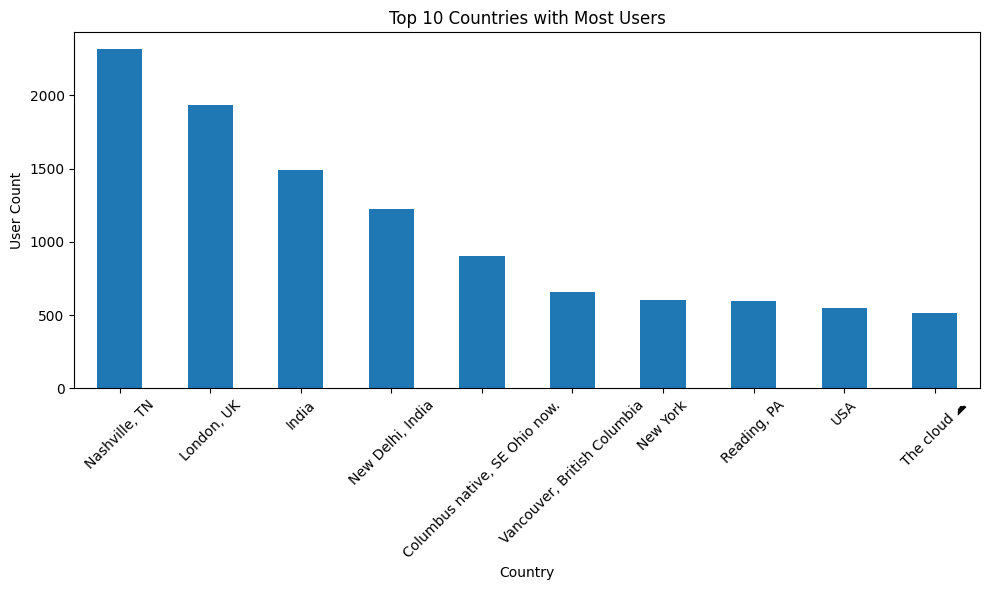

In [ ]:
user_counts = md["user_location"].value_counts()

top_countries = user_counts.head(10)

plt.figure(figsize=(10, 6))
top_countries.plot(kind="bar")
plt.title("Top 10 Countries with Most Users")
plt.xlabel("Country")
plt.ylabel("User Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()









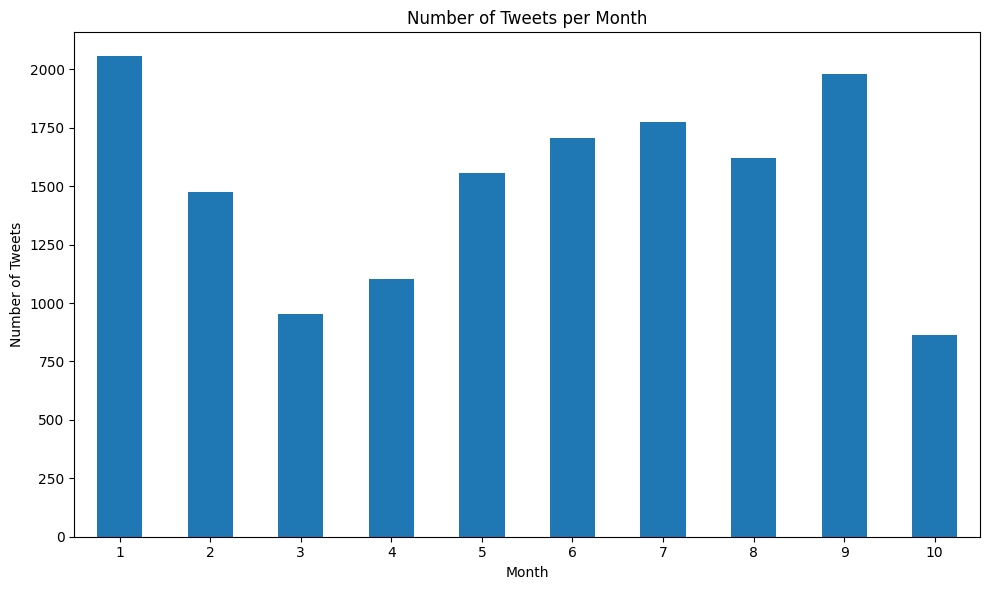

In [ ]:
md["Date"] = pd.to_datetime(md["Date"])

md["Month"] = md["Date"].dt.month

monthly_tweet_counts = md.groupby("Month")["Tweets"].count()

plt.figure(figsize=(10, 6))
monthly_tweet_counts.plot(kind="bar")
plt.title("Number of Tweets per Month")
plt.xlabel("Month")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

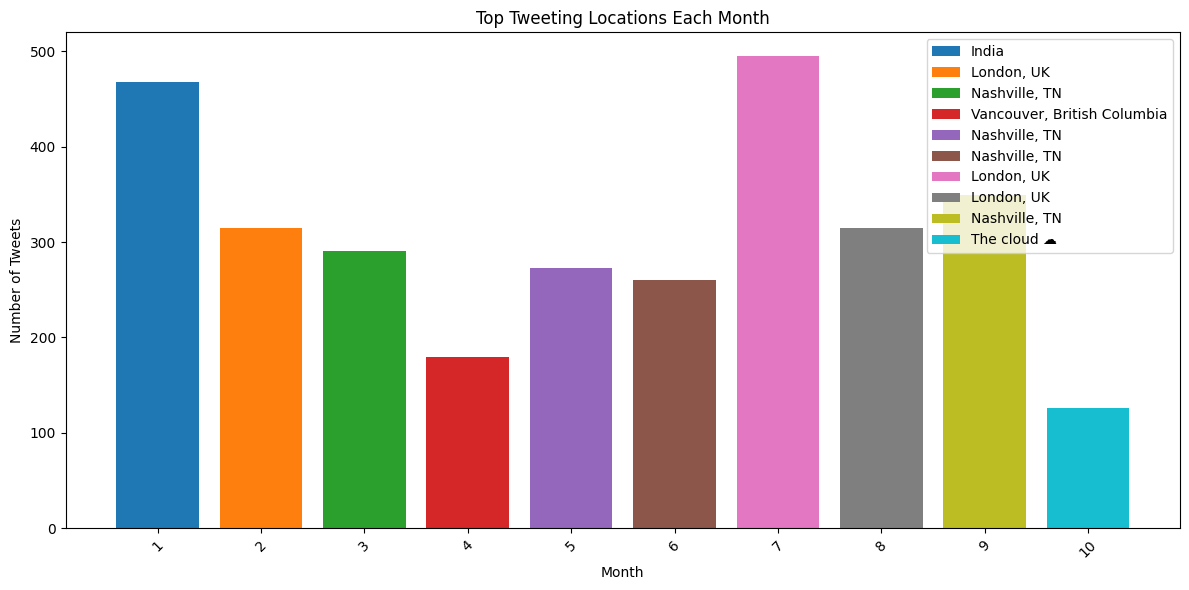

In [ ]:
md["Date"] = pd.to_datetime(md["Date"])

md["Month"] = md["Date"].dt.month

monthly_location_counts = md.groupby(["Month", "user_location"])["Tweets"].count().reset_index()

top_locations = monthly_location_counts.groupby("Month").apply(lambda x: x.loc[x["Tweets"].idxmax()])

plt.figure(figsize=(12, 6))
for month, location in top_locations.iterrows():
    plt.bar(str(month), location["Tweets"], label=location["user_location"])

plt.title("Top Tweeting Locations Each Month")
plt.xlabel("Month")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

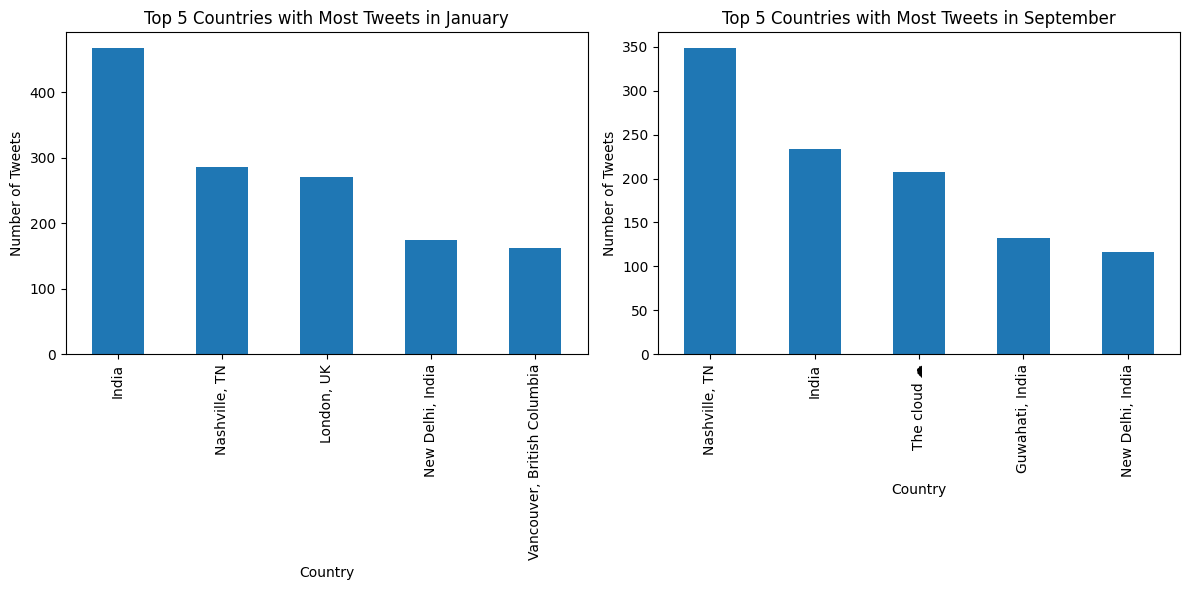

In [ ]:
md["Date"] = pd.to_datetime(md["Date"])


md["Month"] = md["Date"].dt.month
md["user_location"] = md["user_location"].str.strip()

january_data = md[md["Month"] == 1]
september_data = md[md["Month"] == 9]


january_tweet_counts = january_data["user_location"].value_counts()
september_tweet_counts = september_data["user_location"].value_counts()


top_10_january = january_tweet_counts.head(5)
top_10_september = september_tweet_counts.head(5)


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
top_10_january.plot(kind="bar")
plt.title("Top 5 Countries with Most Tweets in January")
plt.xlabel("Country")
plt.ylabel("Number of Tweets")

plt.subplot(1, 2, 2)
top_10_september.plot(kind="bar")
plt.title("Top 5 Countries with Most Tweets in September")
plt.xlabel("Country")
plt.ylabel("Number of Tweets")

plt.tight_layout()
plt.show()

#Clustering

In [ ]:
pip install textblob

In [ ]:
from textblob import TextBlob

md['Sentiment'] = md['Tweets'].apply(lambda x: TextBlob(x).sentiment.polarity)

def classify_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

md['Sentiment_Category'] = md['Sentiment'].apply(classify_sentiment)

print(md[['Tweets', 'Sentiment', 'Sentiment_Category']])

                                                  Tweets  Sentiment  \
0      Medical Minute: Long COVID https://t.co/61wLMk...  -0.025000   
1      OU Health Sciences Center Begins Enrollment Fo...  -0.075000   
2      Long COVID Patients Face Organ Transplants, Lo...  -0.050000   
3      Medical Minute: Long COVID https://t.co/61wLMk...  -0.025000   
4      OU Health Sciences Center Begins Enrollment Fo...  -0.075000   
...                                                  ...        ...   
17713  @IrelandTorin @CJ_Toronto @Rain_Surname @MeetJ...   0.340000   
17714  @lisamjthomas Thanks! And you as well. A frien...   0.066667   
17715  @lisamjthomas Yeah I had it right at the start...   0.121429   
17716             @JessaMooreMedia Long Covid is no fun.  -0.100000   
17717  @amockingbird There’s a Long Covid group on FB...   0.250000   

      Sentiment_Category  
0               negative  
1               negative  
2               negative  
3               negative  
4           

In [ ]:
md

,user_name,user_location,Date,Tweets,Month,Sentiment,Sentiment_Category
0,NEWS9,BENGALURU,2022-04-05 21:41:26+00:00,Medical Minute: Long COVID https://t.co/61wLMk...,4,-0.025000,negative
1,NEWS9,BENGALURU,2022-05-11 12:08:04+00:00,OU Health Sciences Center Begins Enrollment Fo...,5,-0.075000,negative
2,NEWS9,BENGALURU,2022-09-01 21:54:19+00:00,"Long COVID Patients Face Organ Transplants, Lo...",9,-0.050000,negative
3,NEWS9,BENGALURU,2022-04-05 21:41:26+00:00,Medical Minute: Long COVID https://t.co/61wLMk...,4,-0.025000,negative
4,NEWS9,BENGALURU,2022-05-11 12:08:04+00:00,OU Health Sciences Center Begins Enrollment Fo...,5,-0.075000,negative
...,...,...,...,...,...,...,...
17713,raincoaster,"Ottawa, Ontario",2022-04-22 18:19:51+00:00,@IrelandTorin @CJ_Toronto @Rain_Surname @MeetJ...,4,0.340000,positive
17714,raincoaster,"Ottawa, Ontario",2022-04-13 15:05:06+00:00,@lisamjthomas Thanks! And you as well. A frien...,4,0.066667,positive
17715,raincoaster,"Ottawa, Ontario",2022-04-13 14:21:53+00:00,@lisamjthomas Yeah I had it right at the start...,4,0.121429,positive
17716,raincoaster,"Ottawa, Ontario",2022-04-09 19:12:21+00:00,@JessaMooreMedia Long Covid is no fun.,4,-0.100000,negative


In [ ]:
x= md.iloc[:, 3].values
y= md.iloc[:,-1].values


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(y)
y


array([0, 0, 0, ..., 2, 0, 2])

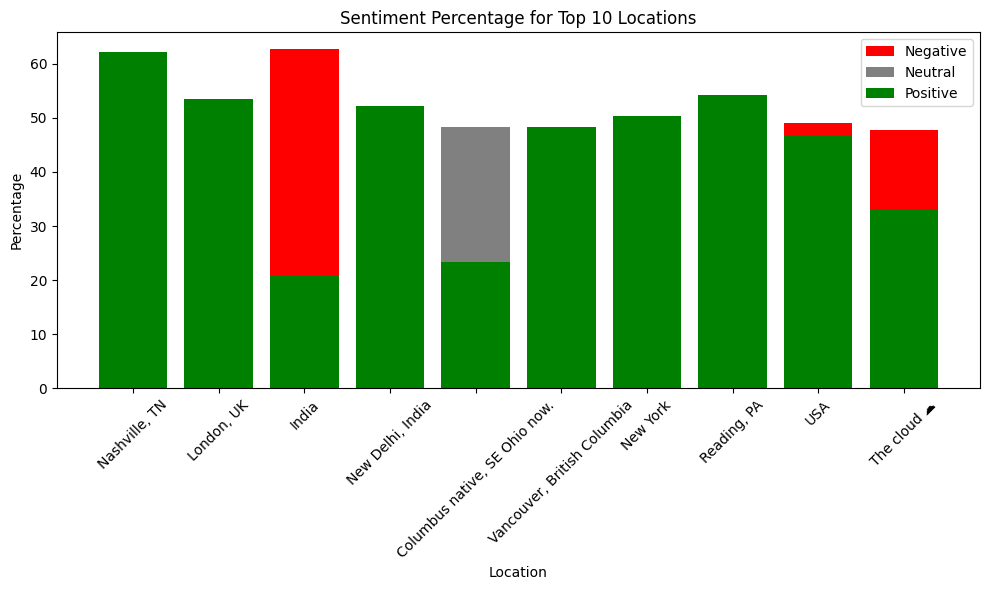

In [ ]:
grouped = md.groupby(['user_location', 'Sentiment_Category']).size().unstack(fill_value=0)
grouped['Total'] = grouped.sum(axis=1)
for sentiment_category in ['negative', 'neutral', 'positive']:
    grouped[sentiment_category + '_percentage'] = grouped[sentiment_category] / grouped['Total'] * 100

top_locations = grouped.nlargest(10, 'Total')

plt.figure(figsize=(10, 6))
colors = ['red', 'gray', 'green']

for i, sentiment_category in enumerate(['negative', 'neutral', 'positive']):
    plt.bar(top_locations.index, top_locations[sentiment_category + '_percentage'], color=colors[i], label=sentiment_category.capitalize())

plt.xlabel('Location')
plt.ylabel('Percentage')
plt.title('Sentiment Percentage for Top 10 Locations')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

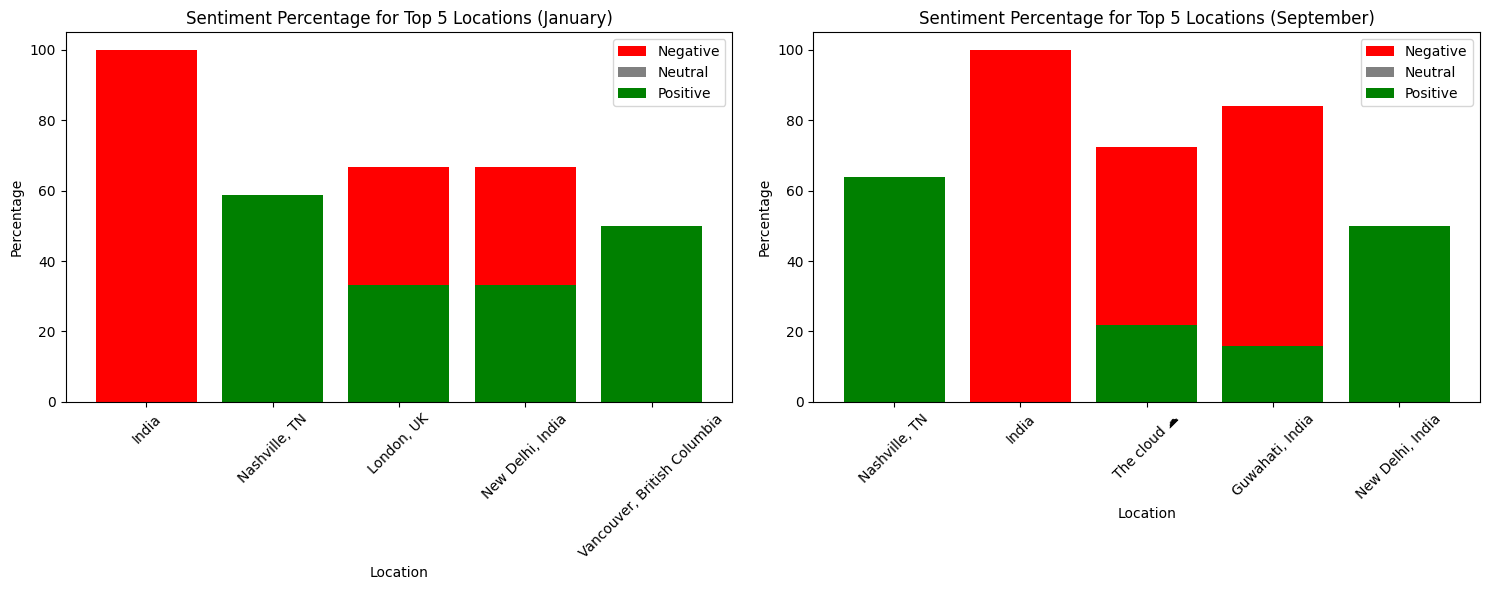

In [ ]:
md_january = md[md['Month'] == 1]
md_september = md[md['Month'] == 9]

def calculate_percentage(grouped_df):
    grouped = grouped_df.groupby(['user_location', 'Sentiment_Category']).size().unstack(fill_value=0)
    grouped['Total'] = grouped.sum(axis=1)
    for sentiment_category in ['negative', 'neutral', 'positive']:
        grouped[sentiment_category + '_percentage'] = grouped[sentiment_category] / grouped['Total'] * 100
    return grouped

grouped_january = calculate_percentage(md_january)
grouped_september = calculate_percentage(md_september)

top_locations_january = grouped_january.nlargest(5, 'Total')
top_locations_september = grouped_september.nlargest(5, 'Total')


plt.figure(figsize=(15, 6))
colors = ['red', 'gray', 'green']

plt.subplot(1, 2, 1)
for i, sentiment_category in enumerate(['negative', 'neutral', 'positive']):
    plt.bar(top_locations_january.index, top_locations_january[sentiment_category + '_percentage'], color=colors[i], label=sentiment_category.capitalize())
plt.xlabel('Location')
plt.ylabel('Percentage')
plt.title('Sentiment Percentage for Top 5 Locations (January)')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 2, 2)
for i, sentiment_category in enumerate(['negative', 'neutral', 'positive']):
    plt.bar(top_locations_september.index, top_locations_september[sentiment_category + '_percentage'], color=colors[i], label=sentiment_category.capitalize())
plt.xlabel('Location')
plt.ylabel('Percentage')
plt.title('Sentiment Percentage for Top 5 Locations (September)')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()
